In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from time import time
from keras.datasets import fashion_mnist
import numpy as np
from keras import regularizers

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))

In [4]:
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [5]:
hidden_1 = Dense(32, activation='relu')(encoded)

In [6]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [7]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [8]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [9]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

In [10]:
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

In [11]:
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 2s 0us/step


In [13]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [14]:
autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.5302 - accuracy: 0.4469 - val_loss: 0.4568 - val_accuracy: 0.0000e+00
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.4257 - accuracy: 0.4883 - val_loss: 0.4038 - val_accuracy: 0.0000e+00
Epoch 3/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.3970 - accuracy: 0.4916 - val_loss: 0.3838 - val_accuracy: 0.0000e+00
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.3802 - accuracy: 0.4943 - val_loss: 0.3670 - val_accuracy: 0.0000e+00
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.3671 - accuracy: 0.4964 - val_loss: 0.3543 - val_accuracy: 0.0000e+00
Epoch 6/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.3575 - accuracy: 0.4979 - val_loss: 0.3447 - val_accuracy: 0.0000e+00
Epoch 7/20
60000/60000 [====================

In [15]:
prediction = autoencoder.predict(x_test_noisy[1].reshape(1,784))

In [16]:
# tensorborad = TensorBoard(log_dir="logs/{}".format(time()))
history = autoencoder.fit(x_train_noisy, x_train, batch_size=256, epochs=10, verbose=1, validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3161 - accuracy: 0.5047 - val_loss: 0.2957 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3153 - accuracy: 0.5048 - val_loss: 0.2945 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3147 - accuracy: 0.5049 - val_loss: 0.2933 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3140 - accuracy: 0.5050 - val_loss: 0.2922 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3134 - accuracy: 0.5051 - val_loss: 0.2912 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3128 - accuracy: 0.5052 - val_loss: 0.2902 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [====================

In [17]:
# encode and decode some digits
# note that we take them from the test set
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

In [18]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

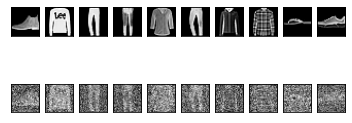

In [19]:
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [20]:
plt.show()

In [21]:
print(history)

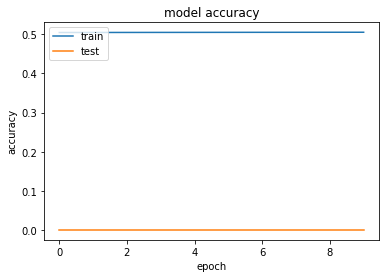

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

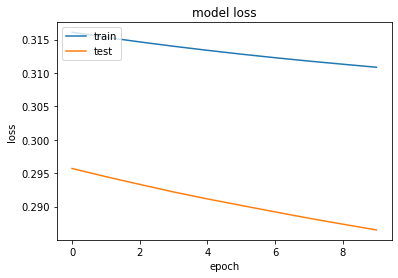

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Bonus Question

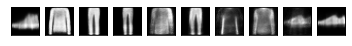

In [24]:
for i in range(n):
  #bonus 
    ax = plt.subplot(4, n, i + 1 + n + n)
    plt.imshow(encoded_imgs[i].reshape(16, 2))
    plt.gray()
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)